In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression as RegModel
from sklearn.model_selection import train_test_split

In [2]:
from warnings import filterwarnings


filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option(
    "display.float_format", lambda x: f"{x:.2f}" if isinstance(x, float) else x
)

## Import data

In [4]:
VVI_COLUMNS = [
    "AGE",
    "AMENITIES",
    "AREA",
    "BALCONY_NUM",
    "BATHROOM_NUM",
    "BEDROOM_NUM",
    "BROKERAGE",
    "BUILDING_ID",
    "BUILDING_NAME",
    "BUILTUP_SQFT",
    "CARPET_SQFT",
    "CITY_ID",
    "CITY",
    "CLASS_HEADING",
    "CLASS_LABEL",
    "COMMON_FURNISHING_ATTRIBUTES",
    "CONTACT_COMPANY_NAME",
    "CONTACT_NAME",
    "DEALER_PHOTO_URL",
    "DESCRIPTION",
    "EXPIRY_DATE",
    "FACING",
    "FEATURES",
    "FLOOR_NUM",
    "FORMATTED_LANDMARK_DETAILS",
    "FORMATTED",
    "FSL_Data",
    "FURNISH",
    "FURNISHING_ATTRIBUTES",
    "GROUP_NAME",
    "LISTING",
    "LOCALITY_WO_CITY",
    "LOCALITY",
    "location",
    "MAP_DETAILS",
    "MAX_AREA_SQFT",
    "MAX_PRICE",
    "MEDIUM_PHOTO_URL",
    "metadata",
    "MIN_AREA_SQFT",
    "MIN_PRICE",
    "OWNTYPE",
    "PD_URL",
    "PHOTO_URL",
    "PREFERENCE",
    "PRICE_PER_UNIT_AREA",
    "PRICE_SQFT",
    "PRICE",
    "profile",
    "PROP_DETAILS_URL",
    "PROP_HEADING",
    "PROP_ID",
    "PROP_NAME",
    "PROPERTY_IMAGES",
    "PROPERTY_TYPE",
    "QUALITY_SCORE",
    "REGISTER_DATE",
    "SECONDARY_TAGS",
    "SOCIETY_NAME",
    "SUPER_SQFT",
    "SUPERBUILTUP_SQFT",
    "THUMBNAIL_IMAGES",
    "TOP_USPS",
    "TOTAL_FLOOR",
    "TOTAL_LANDMARK_COUNT",
    "TRANSACT_TYPE",
    "xid",
]

In [5]:
df: pd.DataFrame = (
    pd.read_csv("data/v2/gurgaon_10.7k.csv", usecols=VVI_COLUMNS)
    .query("PREFERENCE!='p'")
    .map(lambda x: x.lower().replace("\n", " ") if isinstance(x, str) else x)
)  # type: ignore
print(df.shape)
df.head()

/var/folders/33/9m74m8_s3z39fzxgyl19cfjh0000gn/T/ipykernel_29110/3869696602.py:2: DtypeWarning: Columns (206) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("data/v2/gurgaon_10.7k.csv", usecols=VVI_COLUMNS)


(10704, 67)


,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,LOCALITY_WO_CITY,profile,xid,metadata,location,BUILTUP_SQFT,SUPER_SQFT,COMMON_FURNISHING_ATTRIBUTES,QUALITY_SCORE,FURNISHING_ATTRIBUTES
0,o71585872,https://mediacdn.99acres.com/media1/22409/13/4...,https://mediacdn.99acres.com/media1/22409/13/4...,s,4 bhk flat for resale in alpha corp gurgaon one,residential apartment,gurgaon,sector 84 gurgaon,1.00,1,...,sector 84,"{'contact_name': 'gaurav khosla', 'contact_com...","{'projectid': 5096, 'proj_name': 'alpha corp g...","{'prop_photo_count': '4', 'prop_video_count': ...","{'city': '8', 'city_name': 'gurgaon', 'buildin...",NaN,NaN,NaN,NaN,NaN
1,t71585466,https://mediacdn.99acres.com/media1/22425/6/44...,https://mediacdn.99acres.com/media1/22425/6/44...,s,"explore dlf ultima, an upscale ready-to-move h...",residential apartment,gurgaon,sector 81 gurgaon,1.00,1,...,sector 81,"{'contact_name': 'kamal', 'contact_company_nam...","{'projectid': 7182, 'proj_name': 'dlf the ulti...","{'prop_photo_count': '4', 'prop_video_count': ...","{'city': '8', 'city_name': 'gurgaon', 'buildin...",NaN,NaN,NaN,NaN,NaN
2,d71549524,https://mediacdn.99acres.com/media1/22386/13/4...,https://mediacdn.99acres.com/media1/22386/13/4...,r,a 3 bhk flat for rent in sector 66 gurgaon clo...,residential apartment,gurgaon,sector 66 gurgaon,NaN,0,...,sector 66,"{'contact_name': 'sandeep', 'contact_company_n...","{'projectid': 19, 'proj_name': 'emaar mgf the ...","{'prop_photo_count': '1', 'prop_video_count': ...","{'city': '8', 'city_name': 'gurgaon', 'buildin...",1920.00,NaN,NaN,NaN,NaN
3,i71493958,https://mediacdn.99acres.com/media1/22353/14/4...,https://mediacdn.99acres.com/media1/22353/14/4...,s,looking for a 3 bhk property for purchase in g...,residential apartment,gurgaon,sector 112 gurgaon,1.00,1,...,sector 112,"{'contact_name': 'kohli', 'contact_company_nam...","{'projectid': 4342, 'proj_name': 'experion win...","{'prop_photo_count': '1', 'prop_video_count': ...","{'city': '8', 'city_name': 'gurgaon', 'buildin...",2225.56,NaN,NaN,NaN,NaN
4,h71479412,https://mediacdn.99acres.com/media1/22352/4/44...,https://mediacdn.99acres.com/media1/22352/4/44...,r,this 4 bhk flat in sector 104 gurgaon is avail...,residential apartment,gurgaon,sector 104 gurgaon,NaN,0,...,sector 104,"{'contact_name': 'kohli', 'contact_company_nam...","{'projectid': 25860, 'proj_name': 'ats triumph...","{'prop_photo_count': '14', 'prop_video_count':...","{'city': '8', 'city_name': 'gurgaon', 'buildin...",NaN,NaN,NaN,NaN,NaN


In [6]:
df.duplicated("PROP_ID").sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10704 entries, 0 to 10703
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROP_ID                       10704 non-null  object 
 1   PHOTO_URL                     8864 non-null   object 
 2   MEDIUM_PHOTO_URL              8864 non-null   object 
 3   PREFERENCE                    10704 non-null  object 
 4   DESCRIPTION                   10704 non-null  object 
 5   PROPERTY_TYPE                 10704 non-null  object 
 6   CITY                          10704 non-null  object 
 7   LOCALITY                      10704 non-null  object 
 8   TRANSACT_TYPE                 10152 non-null  float64
 9   OWNTYPE                       10704 non-null  int64  
 10  BEDROOM_NUM                   10511 non-null  float64
 11  BATHROOM_NUM                  10704 non-null  int64  
 12  BALCONY_NUM                   10501 non-null  float64
 13  PRICE_

### Categorize columns

In [8]:
imp_cols = [
    "PROP_ID",
    "CITY",
    "CLASS_LABEL",
    "PREFERENCE",
    "PROPERTY_TYPE",
    "PRICE",
    "AREA",
    "CARPET_SQFT",
    "SUPERBUILTUP_SQFT",
    "BUILTUP_SQFT",
    "SUPER_SQFT",
]
groupby_cols = ["CITY", "PREFERENCE", "PROPERTY_TYPE", "CLASS_LABEL"]
area_cols = [
    "AREA",
    "MIN_AREA_SQFT",
    "MAX_AREA_SQFT",
    "CARPET_SQFT",
    "SUPERBUILTUP_SQFT",
    "BUILTUP_SQFT",
    "SUPER_SQFT",
]
imp_area_cols = area_cols[3:].copy()

In [9]:
df["PROP_ID"] = "https://99acres.com/" + df["PROP_ID"].str.upper()

## AREA column analysis

In [10]:
# Extract rows which has all the areas
all_area = df[
    df["BUILTUP_SQFT"].notnull()
    & df["CARPET_SQFT"].notnull()
    & df["SUPERBUILTUP_SQFT"].notnull()
    & df["SUPER_SQFT"].notnull()
]
all_area[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
9534,https://99acres.com/T68595364,gurgaon,dealer,s,independent house/villa,1.8 cr,2700 sq.ft.,0.00,0.00,0.00,2700.00
9580,https://99acres.com/R68641948,gurgaon,dealer,s,independent house/villa,1.86 cr,2700 sq.ft.,0.00,0.00,0.00,2700.00


In [11]:
# Rows with no area feature
no_area = df[
    df["BUILTUP_SQFT"].isnull()
    & df["CARPET_SQFT"].isnull()
    & df["SUPERBUILTUP_SQFT"].isnull()
    & df["SUPER_SQFT"].isnull()
]
no_area[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
972,https://99acres.com/H70722494,gurgaon,dealer,s,residential apartment,5.2 - 6.3 cr,1195-1447 sq.ft.,NaN,NaN,NaN,NaN
1077,https://99acres.com/N70721778,gurgaon,dealer,s,residential apartment,5.39 - 6.33 cr,1737-2040 sq.ft.,NaN,NaN,NaN,NaN
1078,https://99acres.com/Q70721774,gurgaon,dealer,s,residential apartment,3.8 - 4.26 cr,1225-1372 sq.ft.,NaN,NaN,NaN,NaN
1621,https://99acres.com/S71593730,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN
1623,https://99acres.com/E71593726,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN


In this dataset there is no significant data which have no any area feature present. But in the previous analysis with the **4k** dataset we have many `no_area` properties.

**We have to consider this situation as well because this plays a significant role in the analysis. There are many properties falls into this criteria.**

In [12]:
# Properties which has builtup and super_area (plot area) area present
b_su = df[df["BUILTUP_SQFT"].notnull() & df["SUPER_SQFT"].notnull()]
b_su[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
101,https://99acres.com/U68980020,gurgaon,dealer,s,independent house/villa,10.35 cr,512 sq.ft.,NaN,NaN,10000.00,512.00
179,https://99acres.com/S71410830,gurgaon,dealer,r,independent house/villa,1.5 l,3200 sq.ft.,2500.00,NaN,3500.00,3200.00
813,https://99acres.com/A71160398,gurgaon,dealer,s,independent house/villa,price on request,5000 sq.ft.,4200.00,NaN,4500.00,5000.00
854,https://99acres.com/C70935264,gurgaon,dealer,s,independent house/villa,10 cr,3600 sq.ft.,NaN,NaN,65970.00,3600.00
891,https://99acres.com/G70157126,gurgaon,dealer,s,independent house/villa,7.95 cr,270 sq.ft.,22950.00,NaN,27450.00,270.00
...,...,...,...,...,...,...,...,...,...,...,...
9599,https://99acres.com/M51503950,gurgaon,dealer,s,independent house/villa,7.5 cr,2700 sq.ft.,2160.00,NaN,2250.00,2700.00
9748,https://99acres.com/L68259230,gurgaon,dealer,s,independent house/villa,7.5 cr,240 sq.ft.,NaN,NaN,3800.00,240.00
10400,https://99acres.com/G68498232,gurgaon,dealer,s,independent house/villa,7 cr,250 sq.ft.,287.00,NaN,288.00,250.00
10436,https://99acres.com/C71479290,gurgaon,dealer,s,independent house/villa,6.8 cr,6255 sq.ft.,4500.00,NaN,5310.00,6255.00


In [13]:
# Impute BUILTUP_SQFT with SUPER_SQFT
temp = df[df["BUILTUP_SQFT"].isnull() & df["SUPER_SQFT"].notnull()]["SUPER_SQFT"]
df.loc[temp.index, "BUILTUP_SQFT"] = temp
df["BUILTUP_SQFT"].isnull().sum()

7201

In [14]:
# Properties which has all three area present
b_c_sb = df[
    df["BUILTUP_SQFT"].notnull()
    & df["CARPET_SQFT"].notnull()
    & df["SUPERBUILTUP_SQFT"].notnull()
]
b_c_sb[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
2,https://99acres.com/D71549524,gurgaon,dealer,r,residential apartment,"85,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
13,https://99acres.com/U71402258,gurgaon,dealer,r,residential apartment,"70,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
14,https://99acres.com/W71402126,gurgaon,dealer,s,residential apartment,3.5 cr,1950 sq.ft.,1480.00,1950.00,1920.00,NaN
53,https://99acres.com/Y71035092,gurgaon,dealer,s,residential apartment,3.6 cr,2583 sq.ft.,2350.00,2583.00,2420.00,NaN
80,https://99acres.com/E70933318,gurgaon,dealer,s,residential apartment,3.3 cr,2305 sq.ft.,2110.00,2305.00,2210.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10645,https://99acres.com/B68335452,gurgaon,dealer,s,residential apartment,3 cr,2440 sq.ft.,2000.00,2440.00,2200.00,NaN
10646,https://99acres.com/L68313468,gurgaon,dealer,s,residential apartment,3.5 cr,2677 sq.ft.,2000.00,2677.00,2666.00,NaN
10647,https://99acres.com/E65173262,gurgaon,dealer,s,residential apartment,3.2 cr,2382 sq.ft.,2100.00,2382.00,2200.00,NaN
10675,https://99acres.com/M70782428,gurgaon,dealer,s,independent/builder floor,2 cr,2700 sq.ft.,2200.00,2700.00,2400.00,NaN


In [15]:
def calc_ratio(df: pd.DataFrame, f1: str, f2: str) -> float:
    ratio = np.round(
        df[f1].div(df[f2].replace(0, df["BUILTUP_SQFT"].quantile(0.9))).mean(), 3
    )
    return ratio


def print_ratio(df: pd.DataFrame, f1: str, f2: str) -> None:
    print("-" * 56)
    print(f"Ration b/w {f1!r} and {f2!r}:".rjust(50), calc_ratio(df, f1, f2))
    print(f"Ration b/w {f2!r} and {f1!r}:".rjust(50), calc_ratio(df, f2, f1))
    print("-" * 56)

In [16]:
print_ratio(b_c_sb, "CARPET_SQFT", "BUILTUP_SQFT")
print_ratio(b_c_sb, "SUPERBUILTUP_SQFT", "BUILTUP_SQFT")

--------------------------------------------------------
      Ration b/w 'CARPET_SQFT' and 'BUILTUP_SQFT': 0.874
      Ration b/w 'BUILTUP_SQFT' and 'CARPET_SQFT': 1.153
--------------------------------------------------------
--------------------------------------------------------
Ration b/w 'SUPERBUILTUP_SQFT' and 'BUILTUP_SQFT': 1.134
Ration b/w 'BUILTUP_SQFT' and 'SUPERBUILTUP_SQFT': 0.889
--------------------------------------------------------


In [17]:
# Properties which has builtup and carpet area present
b_c = df[df["BUILTUP_SQFT"].notnull() & df["CARPET_SQFT"].notnull()]
b_c[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
2,https://99acres.com/D71549524,gurgaon,dealer,r,residential apartment,"85,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
13,https://99acres.com/U71402258,gurgaon,dealer,r,residential apartment,"70,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
14,https://99acres.com/W71402126,gurgaon,dealer,s,residential apartment,3.5 cr,1950 sq.ft.,1480.00,1950.00,1920.00,NaN
32,https://99acres.com/I71274326,gurgaon,dealer,s,independent house/villa,1.5 cr,1535 sq.ft.,1020.00,NaN,1535.00,1535.00
53,https://99acres.com/Y71035092,gurgaon,dealer,s,residential apartment,3.6 cr,2583 sq.ft.,2350.00,2583.00,2420.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10646,https://99acres.com/L68313468,gurgaon,dealer,s,residential apartment,3.5 cr,2677 sq.ft.,2000.00,2677.00,2666.00,NaN
10647,https://99acres.com/E65173262,gurgaon,dealer,s,residential apartment,3.2 cr,2382 sq.ft.,2100.00,2382.00,2200.00,NaN
10675,https://99acres.com/M70782428,gurgaon,dealer,s,independent/builder floor,2 cr,2700 sq.ft.,2200.00,2700.00,2400.00,NaN
10680,https://99acres.com/S71794148,gurgaon,dealer,s,residential apartment,1.75 cr,2020 sq.ft.,1890.00,2020.00,1930.00,NaN


In [18]:
print_ratio(b_c, "CARPET_SQFT", "BUILTUP_SQFT")

--------------------------------------------------------
      Ration b/w 'CARPET_SQFT' and 'BUILTUP_SQFT': 0.877
      Ration b/w 'BUILTUP_SQFT' and 'CARPET_SQFT': 1.159
--------------------------------------------------------


In [19]:
# Properties which has builtup and super_builtup area present
b_sb = df[df["BUILTUP_SQFT"].notnull() & df["SUPERBUILTUP_SQFT"].notnull()]
b_sb[imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
2,https://99acres.com/D71549524,gurgaon,dealer,r,residential apartment,"85,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
3,https://99acres.com/I71493958,gurgaon,dealer,s,residential apartment,3.85 cr,2802 sq.ft.,NaN,2802.00,2225.56,NaN
13,https://99acres.com/U71402258,gurgaon,dealer,r,residential apartment,"70,000",1950 sq.ft.,1450.00,1950.00,1920.00,NaN
14,https://99acres.com/W71402126,gurgaon,dealer,s,residential apartment,3.5 cr,1950 sq.ft.,1480.00,1950.00,1920.00,NaN
53,https://99acres.com/Y71035092,gurgaon,dealer,s,residential apartment,3.6 cr,2583 sq.ft.,2350.00,2583.00,2420.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10647,https://99acres.com/E65173262,gurgaon,dealer,s,residential apartment,3.2 cr,2382 sq.ft.,2100.00,2382.00,2200.00,NaN
10648,https://99acres.com/P71791370,gurgaon,dealer,s,residential apartment,1.55 cr,1750 sq.ft.,NaN,1750.00,1480.00,NaN
10649,https://99acres.com/X71791298,gurgaon,dealer,s,residential apartment,1.95 cr,2150 sq.ft.,NaN,2150.00,1820.00,NaN
10675,https://99acres.com/M70782428,gurgaon,dealer,s,independent/builder floor,2 cr,2700 sq.ft.,2200.00,2700.00,2400.00,NaN


In [20]:
print_ratio(b_sb, "SUPERBUILTUP_SQFT", "BUILTUP_SQFT")

--------------------------------------------------------
Ration b/w 'SUPERBUILTUP_SQFT' and 'BUILTUP_SQFT': 1.139
Ration b/w 'BUILTUP_SQFT' and 'SUPERBUILTUP_SQFT': 0.886
--------------------------------------------------------


## Estmating `BUILTUP_AREA`

#### Regression graphs

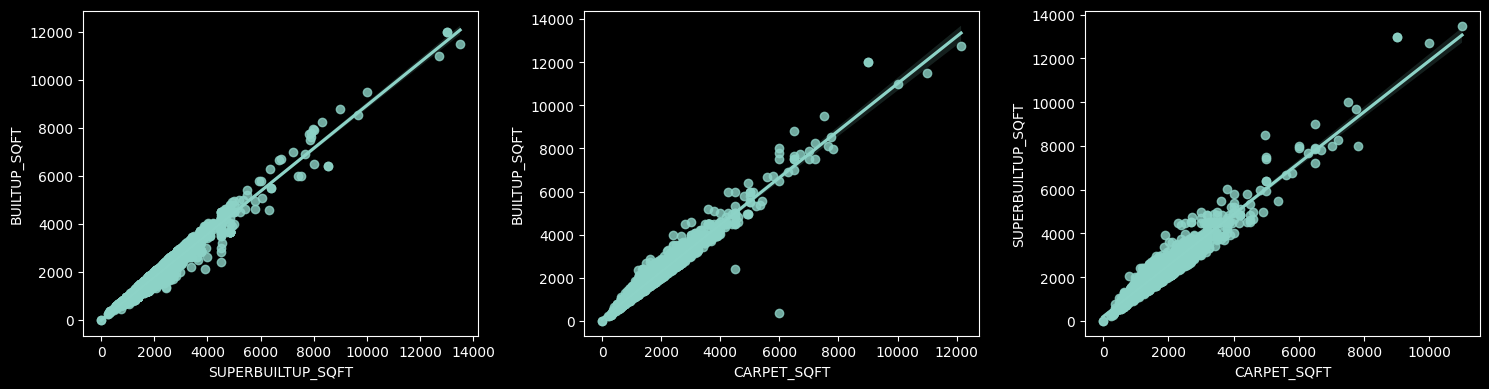

In [21]:
temp = df.query("BUILTUP_SQFT<15_000")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(temp, x="SUPERBUILTUP_SQFT", y="BUILTUP_SQFT", ax=ax1)
sns.regplot(temp, x="CARPET_SQFT", y="BUILTUP_SQFT", ax=ax2)
sns.regplot(temp, x="CARPET_SQFT", y="SUPERBUILTUP_SQFT", ax=ax3)
fig.tight_layout()

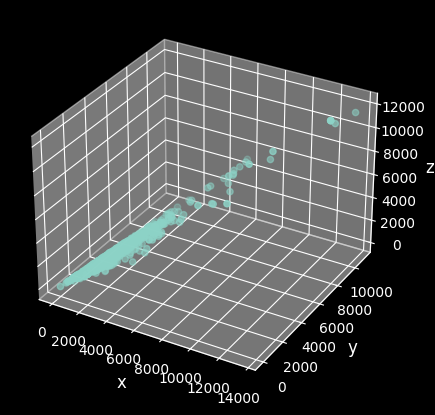

In [22]:
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection="3d")
ax.scatter(df["SUPERBUILTUP_SQFT"], df["CARPET_SQFT"], df["BUILTUP_SQFT"])

ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("z", fontsize=12)  # type: ignore
plt.show()

#### Approach

1. Impute with `SUPER_SQFT` values.
2. Create three models with `CARPET_SQFT` and `SUPERBUILTUP_SQFT`.

```python
X = b_c[["CARPET_SQFT"]]  # model1
X = b_sb[["SUPERBUILTUP_SQFT"]]  # model2
X = b_c_sb[["CARPET_SQFT", "SUPERBUILTUP_SQFT"]]  # model3 # You can ignore this
```

3. Then estimate `BUILTUP_SQFT` using those model only with the corresponding criteria.

> **For Example:**
>
> With `model3`, you have to impute those `BUILTUP_SQFT` values which have both `CARPET_SQFT` and `SUPERBUILTUP_SQFT` are available.
>
> Similarly, with `model1` estimate only those where `CARPET_SQFT` is available but `BUILTUP_SQFT` is absent.

> **Note:**
>
> Here, you have notice that you have an intersection of data in `model1` and `model3`. Due to this you can ignore `model3` and build only `model2` and `model3`. Or you can build all three but you have to handle that situation.


### Model1: `CARPET_AREA`

In [23]:
def calc_scores(model: RegModel) -> None:
    y_pred = model.predict(X_test)  # type: ignore
    print(f"r2_score: {r2_score(y_test, y_pred)}")  # type: ignore
    print(f"mae: {mean_absolute_error(y_test, y_pred)}")  # type: ignore

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    b_c[["CARPET_SQFT"]], b_c["BUILTUP_SQFT"], test_size=0.2, random_state=42
)
print("Shape:", X_train.shape, X_test.shape)

model1 = RegModel()
model1.fit(X_train, y_train)
calc_scores(model1)

Shape: (1791, 1) (448, 1)
r2_score: 0.9681195485637605
mae: 159.31837056187078


### Model2: `SUPERBUILTUP_SQFT`

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    b_sb[["SUPERBUILTUP_SQFT"]], b_sb["BUILTUP_SQFT"], test_size=0.2, random_state=42
)
print("Shape:", X_train.shape, X_test.shape)
model2 = RegModel()
model2.fit(X_train, y_train)
calc_scores(model2)

Shape: (1720, 1) (431, 1)
r2_score: 0.9485296041704209
mae: 157.40643413636897


### Model3: `CARPET_SQFT` and `SUPERBUILTUP_SQFT`

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    b_c_sb[["CARPET_SQFT", "SUPERBUILTUP_SQFT"]],
    b_c_sb["BUILTUP_SQFT"],
    test_size=0.2,
    random_state=42,
)
print("Shape:", X_train.shape, X_test.shape)
model3 = RegModel()
model3.fit(X_train, y_train)
calc_scores(model3)

Shape: (1591, 2) (398, 2)
r2_score: 0.9791768375233693
mae: 93.08012384570644


### Impute the NaN values

In [27]:
df["BUILTUP_SQFT"].isnull().sum()

7201

In [28]:
b_c_sb_nan = df[
    df["BUILTUP_SQFT"].isnull()
    & df["SUPERBUILTUP_SQFT"].notnull()
    & df["CARPET_SQFT"].notnull()
]
print(b_c_sb_nan.shape)
b_c_sb_nan[area_cols].head()

(1665, 67)


,AREA,MIN_AREA_SQFT,MAX_AREA_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
0,3434 sq.ft.,319.03,319.03,3000.00,3434.00,NaN,NaN
1,2870 sq.ft.,266.63,266.63,1700.00,2870.00,NaN,NaN
11,4850 sq.ft.,450.58,450.58,3080.00,4850.00,NaN,NaN
20,2430 sq.ft.,225.75,225.75,1212.00,2430.00,NaN,NaN
22,1250 sq.ft.,116.13,116.13,950.00,1250.00,NaN,NaN


In [29]:
df.loc[b_c_sb_nan.index, "BUILTUP_SQFT"] = model3.predict(
    b_c_sb_nan[["CARPET_SQFT", "SUPERBUILTUP_SQFT"]]
)
df["BUILTUP_SQFT"].isnull().sum()

5536

In [30]:
b_c_nan = df[df["BUILTUP_SQFT"].isnull() & df["CARPET_SQFT"].notnull()]
print(b_c_nan.shape)
b_c_nan[area_cols].head()

(2635, 67)


,AREA,MIN_AREA_SQFT,MAX_AREA_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
25,2200 sq.ft.,204.39,204.39,2200.00,NaN,NaN,NaN
56,2570 sq.ft.,238.76,238.76,2570.00,NaN,NaN,NaN
57,2510 sq.ft.,233.19,233.19,2510.00,NaN,NaN,NaN
58,2717 sq.ft.,252.42,252.42,2717.00,NaN,NaN,NaN
59,2600 sq.ft.,241.55,241.55,2600.00,NaN,NaN,NaN


In [31]:
df.loc[b_c_nan.index, "BUILTUP_SQFT"] = model1.predict(b_c_nan[["CARPET_SQFT"]])
df["BUILTUP_SQFT"].isnull().sum()

2901

In [32]:
b_sb_nan = df[df["BUILTUP_SQFT"].isnull() & df["SUPERBUILTUP_SQFT"].notnull()]
print(b_sb_nan.shape)
b_sb_nan[area_cols].head()

(2896, 67)


,AREA,MIN_AREA_SQFT,MAX_AREA_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
4,2290 sq.ft.,212.75,212.75,NaN,2290.00,NaN,NaN
5,2290 sq.ft.,212.75,212.75,NaN,2290.00,NaN,NaN
6,3150 sq.ft.,292.64,292.64,NaN,3150.00,NaN,NaN
7,1400 sq.ft.,130.06,130.06,NaN,1400.00,NaN,NaN
9,2727 sq.ft.,253.35,253.35,NaN,2727.00,NaN,NaN


In [33]:
df.loc[b_sb_nan.index, "BUILTUP_SQFT"] = model2.predict(b_sb_nan[["SUPERBUILTUP_SQFT"]])
df["BUILTUP_SQFT"].isnull().sum()

5

In [34]:
df[df["BUILTUP_SQFT"].isnull()][imp_cols]

,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT
972,https://99acres.com/H70722494,gurgaon,dealer,s,residential apartment,5.2 - 6.3 cr,1195-1447 sq.ft.,NaN,NaN,NaN,NaN
1077,https://99acres.com/N70721778,gurgaon,dealer,s,residential apartment,5.39 - 6.33 cr,1737-2040 sq.ft.,NaN,NaN,NaN,NaN
1078,https://99acres.com/Q70721774,gurgaon,dealer,s,residential apartment,3.8 - 4.26 cr,1225-1372 sq.ft.,NaN,NaN,NaN,NaN
1621,https://99acres.com/S71593730,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN
1623,https://99acres.com/E71593726,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN


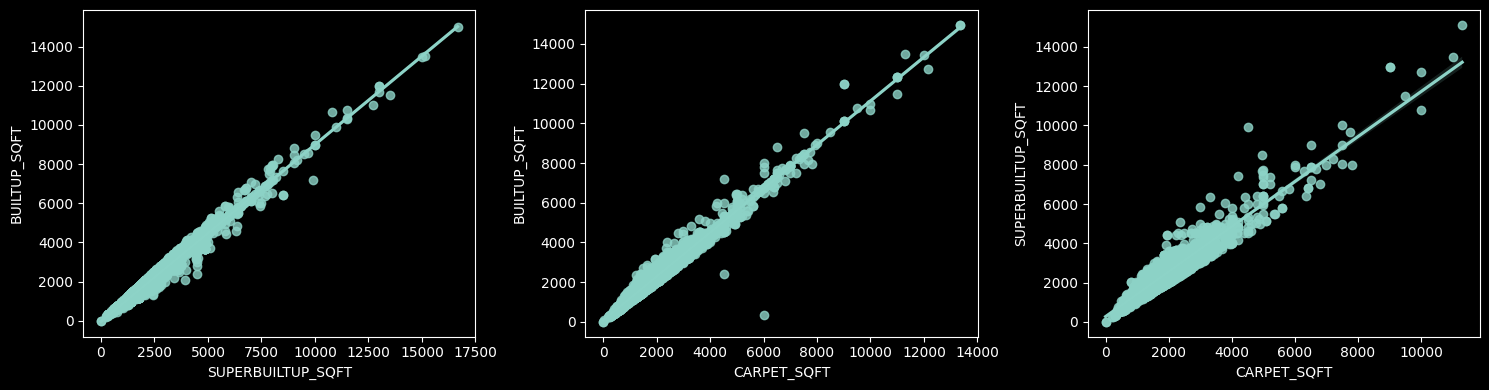

In [35]:
temp = df.query("BUILTUP_SQFT<15_000")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(temp, x="SUPERBUILTUP_SQFT", y="BUILTUP_SQFT", ax=ax1)
sns.regplot(temp, x="CARPET_SQFT", y="BUILTUP_SQFT", ax=ax2)
sns.regplot(temp, x="CARPET_SQFT", y="SUPERBUILTUP_SQFT", ax=ax3)
fig.tight_layout()

### Impute all NaN areas properties

In [36]:
temp = no_area[imp_cols + area_cols[1:3]]
print(temp.shape)
temp.head()

(5, 13)


,PROP_ID,CITY,CLASS_LABEL,PREFERENCE,PROPERTY_TYPE,PRICE,AREA,CARPET_SQFT,SUPERBUILTUP_SQFT,BUILTUP_SQFT,SUPER_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT
972,https://99acres.com/H70722494,gurgaon,dealer,s,residential apartment,5.2 - 6.3 cr,1195-1447 sq.ft.,NaN,NaN,NaN,NaN,111.02,134.43
1077,https://99acres.com/N70721778,gurgaon,dealer,s,residential apartment,5.39 - 6.33 cr,1737-2040 sq.ft.,NaN,NaN,NaN,NaN,161.37,189.52
1078,https://99acres.com/Q70721774,gurgaon,dealer,s,residential apartment,3.8 - 4.26 cr,1225-1372 sq.ft.,NaN,NaN,NaN,NaN,113.81,127.46
1621,https://99acres.com/S71593730,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN,110.83,111.48
1623,https://99acres.com/E71593726,gurgaon,dealer,s,residential apartment,1.3 - 1.31 cr,1193-1200 sq.ft.,NaN,NaN,NaN,NaN,110.83,111.48


In [37]:
no_area["AREA"].str.split(" ").str.get(0).str.split("-", expand=True).astype(float)

,0,1
972,1195.00,1447.00
1077,1737.00,2040.00
1078,1225.00,1372.00
1621,1193.00,1200.00
1623,1193.00,1200.00


In [38]:
# I need some time to think about how to impute these values.
#
# To be continued...